In [1]:
%conda install matplotlib -y

Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 23.3.1
  latest version: 23.10.0

Please update conda by running

    $ conda update -n base -c defaults conda

Or to minimize the number of packages updated during conda update use

     conda install conda=23.10.0



# All requested packages already installed.


Note: you may need to restart the kernel to use updated packages.


## Logistic Regression

### Maximum Likelihood Estimation
Calculate a model that maximizes the probability of current data coming out

In [2]:
import pandas as pd
from sklearn import datasets

raw = datasets.load_breast_cancer()

example = pd.DataFrame(data=raw.data, columns=raw.feature_names)
example["label"] = raw.target

example.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,label
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [3]:
X = example[["worst texture"]]
Y = example["label"]

In [4]:
from sklearn.linear_model import LogisticRegression

logistic_model = LogisticRegression()
logistic_model.fit(X, Y)

logistic_accuracy = logistic_model.score(X, Y)

print(f"Logistic Regression Accuracy: {logistic_accuracy}")

Logistic Regression Accuracy: 0.7205623901581723


## SVM

Calculate the hyperplane to maximize margin among multiple hyperplanes

In [18]:
import sklearn.svm as svm

svm_model = svm.SVC(kernel='linear')
svm_model.fit(X, Y)

svm_accuracy = svm_model.score(X, Y)

print(f"SVM accuracy: {svm_accuracy}")

SVM accuracy: 0.7170474516695958


## Classifier assessment

### Calculate the four metrics

In [6]:
from sklearn.metrics import confusion_matrix

pred = svm_model.predict(X)

confusion_matrix(Y, pred)

array([[110, 102],
       [ 59, 298]])

- Accuracy: (298 + 110) / (298 + 110 + 38 + 19) = 71.70%  
- Sensitivity: 298 / (298 + 59) = 83.47%  
- Precision: 298 / (298 + 102) = 74.50%  
- F1 score: 2 * (83.47% * 74.50%) / (83.47% + 74.50%) = 78.73

In [20]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score

print (f"Accuracy calculated by code: {accuracy_score(Y, pred)}")
print (f"Sensitivity calculated by code: {recall_score(Y, pred)}")
print (f"Precision calculated by: {precision_score(Y, pred)}")
print (f"F1 score calculated by code: {f1_score(Y, pred)}")

Accuracy calculated by code: 0.7170474516695958
Sensitivity calculated by code: 0.834733893557423
Precision calculated by: 0.745
F1 score calculated by code: 0.7873183619550859


### Train-test split
However, the evaluation so far is not the correct evaluation method because it has used the learning data as it is.  
=> Split the data at a ratio of 8:2!

In [8]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(example, test_size=.2, random_state=2)

In [9]:
train_X = train[["worst texture"]]
train_Y = train["label"]

test_X = test[["worst texture"]]
test_Y = test["label"]

In [21]:
logistic_model = LogisticRegression()
logistic_model.fit(train_X, train_Y)

logistic_accuracy = logistic_model.score(test_X, test_Y)

print(f"Precise logistic regression accuracy: {logistic_accuracy}")



svm_model = svm.SVC(kernel='linear')
svm_model.fit(train_X, train_Y)

svm_accuracy = svm_model.score(test_X, test_Y)

print(f"Precise SVM accuracy: {svm_accuracy}")

Precise logistic regression accuracy: 0.8947368421052632
Precise SVM accuracy: 0.9035087719298246


## Practice

### Logistic Regression Practice
It is data on cancer patients. Use logistic regression and SVM, but achieve higher accuracy.

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import datasets

raw = datasets.load_breast_cancer()

example = pd.DataFrame(data=raw.data, columns=raw.feature_names)
example["label"] = raw.target

example.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,label
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


First, check what features there are.

In [12]:
print(raw.feature_names)

['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


It can be seen that there are a total of three values: 'mean', 'work', and 'error' for several important characteristics (radius, symmetry, etc.).  
Based on the assumption that the 'worst' and 'error' will not be of great importance, use only 'mean'.

In [13]:
new_columns_names = ['mean radius', 'mean texture', 'mean perimeter', 'mean area', 'mean smoothness', 'mean compactness', 'mean concavity',
                      'mean concave points', 'mean symmetry', 'mean fractal dimension']

And among them, the correlation between features is identified to determine which features to use. (After calculating the correlation coefficient, it was expressed as a heat map.)

In [14]:
corr = example[new_columns_names].corr()

<Axes: >

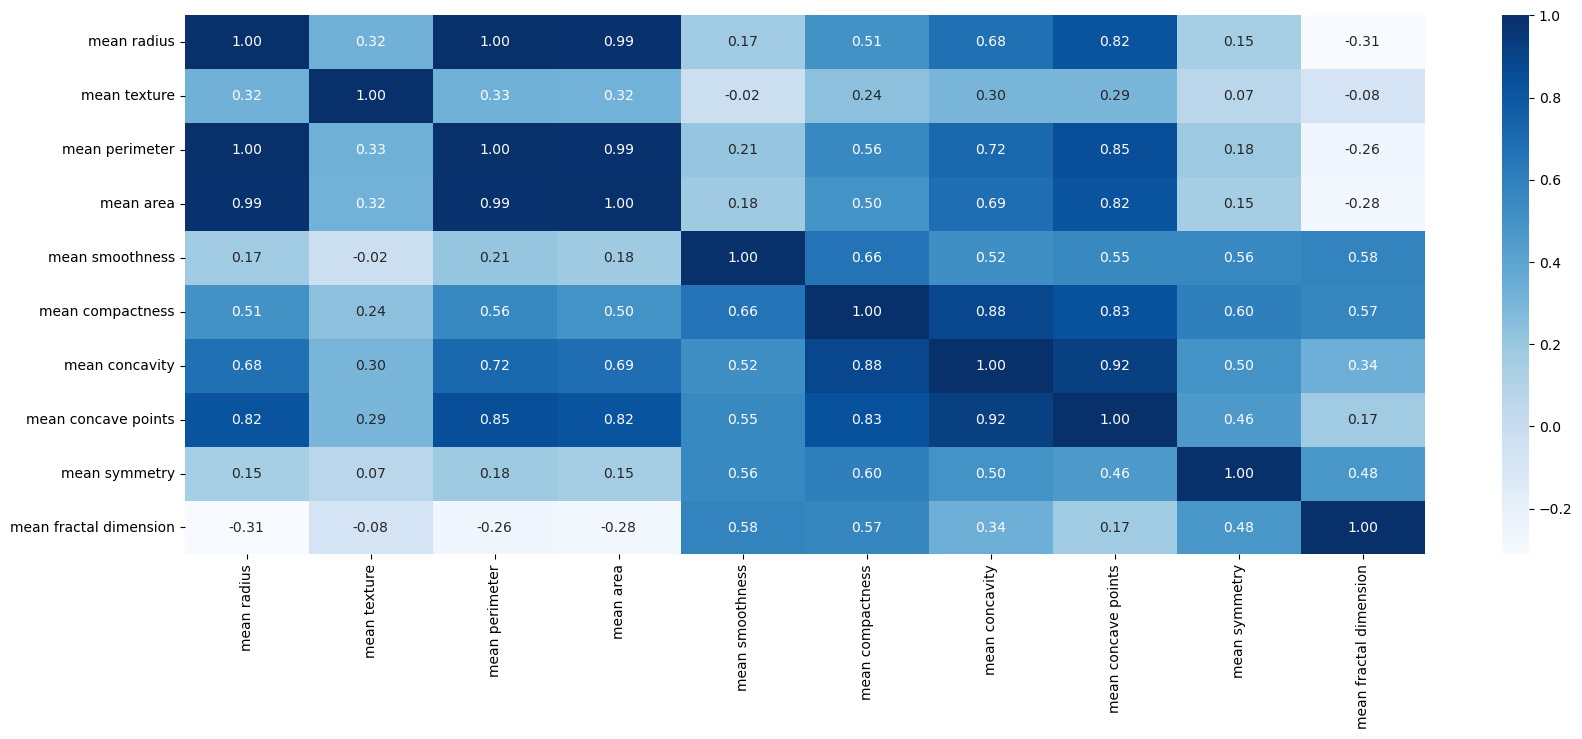

In [15]:
plt.figure(figsize=(20,7))
sns.heatmap(corr, annot=True, fmt=".2f", cmap="Blues")

At this time, radius, perimeter, area, and concave points have a high correlation with each other, and fitness and concavity have a high correlation with each other, so the features to be used are reduced as follows.

In [16]:
compact_columns_names = ['mean radius', 'mean texture', 'mean smoothness', 'mean compactness', 'mean symmetry', 'mean fractal dimension']

Now proceed with the analysis and evaluate.

In [22]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

import sklearn.svm as svm


train, test = train_test_split(example, test_size=.2, random_state=2)
train_X = train[compact_columns_names]
train_Y = train["label"]

test_X = test[compact_columns_names]
test_Y = test["label"]

logistic_model = LogisticRegression()
logistic_model.fit(train_X, train_Y)

logistic_accuracy = logistic_model.score(test_X, test_Y)

print(f"Logistic Regression Accuracy: {logistic_accuracy}")


svm_model = svm.SVC(kernel='linear')
svm_model.fit(train_X, train_Y)

svm_accuracy = svm_model.score(test_X, test_Y)

print(f"SVM Accuracy: {svm_accuracy}")

Logistic Regression Accuracy: 0.8947368421052632
SVM Accuracy: 0.9035087719298246
